# PHZ Porject Regression Analysis

## This script contains the following:
### 1 Importing Libraries and Data
### 2 Data Cleaning
### 3 Data Analysis
### 4 Regression Analysis
### 5 Outlier Removal
### 6 Retesting with Outliers Removed
### 7 Logarithmic Transformations
### 8 Logarithmic Regression Analysis
### 9 Repeating Log Reg Analysis Without Zero Values
### 10 Reflections

w.

## 1 Importing Libraries and Data

In [5]:
#importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# ensure graphs are displayed within notebook without having to call them
%matplotlib inline

In [7]:
path = r"C:\Users\Noah\Achievement 6"

In [8]:
df = pd.read_csv(os.path.join(path, '02 Data', 'CLEANED', 'df_corn_analysis.csv'))

## 2 Data Cleaning

In [10]:
df.head()

,Unnamed: 0,Year,County,State,Zip code,latitude,longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales ($),CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7b,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7b,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7b,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7b,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7a,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


In [11]:
# renaming columns
df.rename(columns = {'Zip code' : 'Zip', 'latitude' : 'Latitude', 'longitude' : 'Longitude', 'Sales ($)' : 'Sales', 'Plant Hardiness Zone' : 'PHZ'}, inplace = True)

In [12]:
df.head()

,Unnamed: 0,Year,County,State,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7b,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7b,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7b,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7b,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7a,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


In [13]:
# create a mapping function for converting Plant Hardiness Zone to number for correlation
def convert_alphanumeric(value):
    # Extract the numeric part and the letter part
    if pd.isna(value):
        return None  # Handle NaN values
    num_part = int(value[:-1])
    letter_part = value[-1].lower()
    
    # Create a mapping for letters
    letter_mapping = {'a': 0.1, 'b': 0.2}
    
    # Convert the value to a float
    return num_part + letter_mapping.get(letter_part, 0)

# converting to alphanumeric PHZ
df['PHZ'] = df['PHZ'].apply(convert_alphanumeric)

In [14]:
df.head(5)

,Unnamed: 0,Year,County,State,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7.2,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7.2,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7.2,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7.2,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


In [15]:
df.shape

(5064, 15)

In [16]:
# check for missing

df.isnull().sum()

Unnamed: 0              0
Year                    0
County                  0
State                   0
Zip                     0
Latitude                0
Longitude               0
PHZ                     0
Corn Acres Harvested    0
Sales                   0
CV                      0
State ANSI              0
Ag District             0
Ag District Code        0
Concatenated            0
dtype: int64

In [17]:
# check for dups
dups = df.duplicated()
dups.shape

(5064,)

C:\Users\Noah\AppData\Local\Temp\ipykernel_26464\299955813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Corn Acres Harvested'], bins=25) # Shows extreme values


<Axes: xlabel='Corn Acres Harvested', ylabel='Density'>

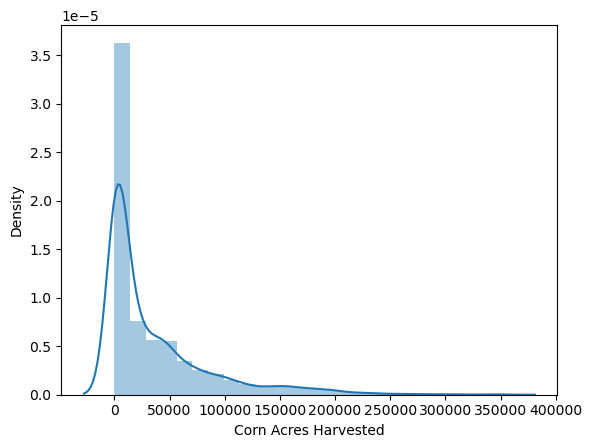

In [18]:
sns.distplot(df['Corn Acres Harvested'], bins=25) # Shows extreme values


Extreme values are present. Since I am using them in the geographic analysis, I want to leave these values in the regression analysis too. Megafarms are a part of the landscape when it comes to crop production in the US

In [20]:
# also creating separate subsets for 2012 and 2022

df_2012=df[df['Year'] == 2012]
df_2022=df[df['Year'] == 2022]

df_12 = df_2012[['Year','County','State','Zip','Latitude','Longitude','PHZ','Corn Acres Harvested','Sales','CV','State ANSI','Ag District','Ag District Code','Concatenated']]
df_22 = df_2022[['Year','County','State','Zip','Latitude','Longitude','PHZ','Corn Acres Harvested','Sales','CV','State ANSI','Ag District','Ag District Code','Concatenated']]


In [21]:
print(df_12)

      Year      County       State    Zip  Latitude  Longitude  PHZ  \
12    2012       UNION  NEW MEXICO  88410     35.91    -103.15  6.2   
13    2012  RIO ARRIBA  NEW MEXICO  87012     36.11    -106.66  6.1   
14    2012    SANDOVAL  NEW MEXICO  87001     35.38    -106.47  7.2   
15    2012    SANTA FE  NEW MEXICO  87010     35.37    -106.14  7.1   
16    2012        TAOS  NEW MEXICO  87512     36.94    -105.45  5.2   
...    ...         ...         ...    ...       ...        ...  ...   
4370  2012     COCHISE     ARIZONA  85602     32.19    -110.38  8.2   
4371  2012      GRAHAM     ARIZONA  85530     33.07    -110.25  8.2   
4372  2012    MARICOPA     ARIZONA  85001     33.45    -112.06  9.2   
4373  2012       PINAL     ARIZONA  85117     33.42    -111.54  9.2   
4374  2012        YUMA     ARIZONA  85333     32.94    -113.34  9.2   

      Corn Acres Harvested     Sales    CV  State ANSI Ag District  \
12                  9824.0  12110000   2.5          35   NORTHEAST   
13     

In [22]:
print(df_22)

      Year    County          State    Zip  Latitude  Longitude  PHZ  \
0     2022     CREEK       OKLAHOMA  74010     35.83     -96.39  7.2   
1     2022     GRADY       OKLAHOMA  73002     34.92     -97.77  7.2   
2     2022   MCCLAIN       OKLAHOMA  73010     35.14     -97.65  7.2   
3     2022     PAYNE       OKLAHOMA  74023     35.97     -96.76  7.2   
4     2022     MAJOR       OKLAHOMA  73718     36.24     -98.18  7.1   
...    ...       ...            ...    ...       ...        ...  ...   
5059  2022   KANAWHA  WEST VIRGINIA  25015     38.23     -81.53  7.1   
5060  2022   LINCOLN  WEST VIRGINIA  25003     38.28     -81.84  7.1   
5061  2022   ASHLAND      WISCONSIN  54514     46.01     -90.49  4.1   
5062  2022   NATRONA        WYOMING  82601     42.83    -106.32  5.1   
5063  2022  NIOBRARA        WYOMING  82222     43.20    -104.65  4.2   

      Corn Acres Harvested    Sales   CV  State ANSI    Ag District  \
0                    244.0    71000  0.3          40        CENT

## 3 Data Analysis

In [24]:
df['Corn Acres Harvested'].mean() # Check the mean

35800.44952017648

In [25]:
df['Corn Acres Harvested'].median() # Check the median

12834.0

In [26]:
df['Corn Acres Harvested'].min() # Check the min

3.0

In [27]:
df['Corn Acres Harvested'].max() # Check the max

353558.0

In [28]:
df_12['Corn Acres Harvested'].mean() # Check the mean 2012

37858.099738675955

In [29]:
df_22['Corn Acres Harvested'].mean() # Check the mean 2022

34093.67029269281

#### mean is lower in 2022. Is less production due to climate change?

In [31]:
df_12['Corn Acres Harvested'].median()

11018.0

In [32]:
df_22['Corn Acres Harvested'].median()

14234.5

#### median in 2022 is higher... could mean more megafarms in 2012? more data points in 2022?

In [34]:
df_12['Corn Acres Harvested'].max()

353558.0

In [35]:
df_22['Corn Acres Harvested'].max()

304340.0

#### lower max data in 2022 as well.

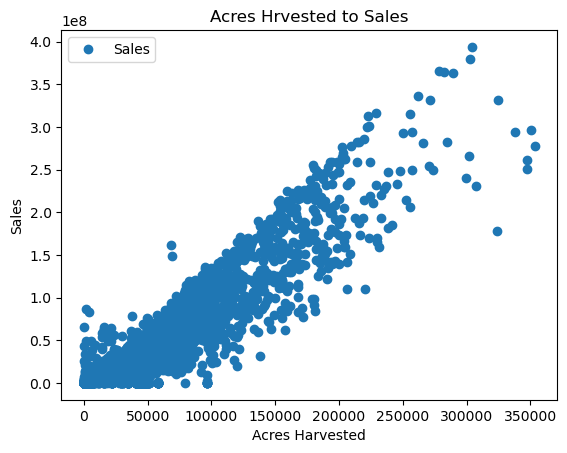

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Corn Acres Harvested', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Acres Hrvested to Sales')  
plt.xlabel('Acres Harvested')  
plt.ylabel('Sales')  
plt.show()

### the obvious hypothesis is that sales increase as more acres of corn are harvested...

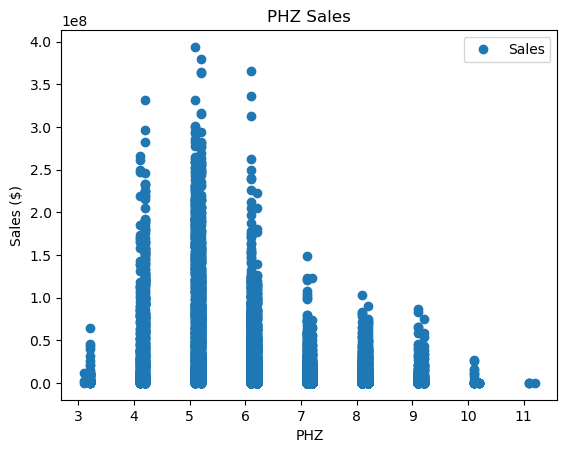

In [39]:
df.plot(x = 'PHZ', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('PHZ Sales')  
plt.xlabel('PHZ')  
plt.ylabel('Sales ($)')  
plt.show()

### I hypothesize that there are ideal regions for growing and that the further south (increasing PHZ) the worse crop sales become.

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Corn Acres Harvested'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [42]:
X

array([[ 244.],
       [3063.],
       [3167.],
       ...,
       [1796.],
       [ 638.],
       [1064.]])

In [43]:
y

array([[  71000],
       [2834000],
       [1941000],
       ...,
       [ 918000],
       [1536000],
       [1758000]], dtype=int64)

In [44]:
X.shape

(5064, 1)

In [45]:
y.shape

(5064, 1)

In [46]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

#### creating a regression model with Sales and Corn Acres Harvested Data

In [49]:
# Create a regression object.

regression = LinearRegression()  #  will be fit onto the training set.

In [50]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

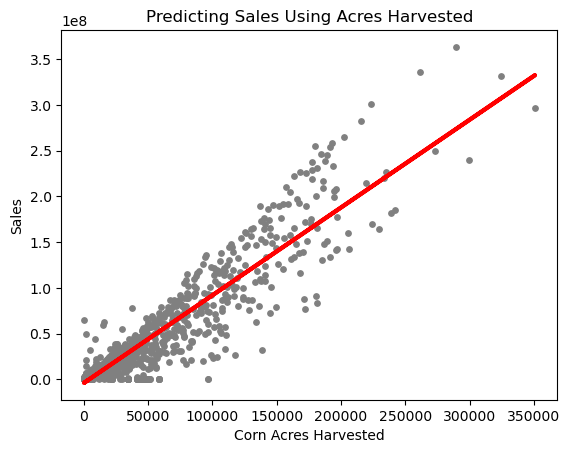

In [52]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Predicting Sales Using Acres Harvested')
plot_test.xlabel('Corn Acres Harvested')
plot_test.ylabel('Sales')
plot_test.show()

In [53]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [54]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[958.81908497]]
Mean squared error:  387274836278982.1
R2 score:  0.8560645512766707


### absolutely massive MSE... maybe including extremes not a good idea as it skews the prediction?

## 5 Outlier Removal

In [57]:
# importing library for z-score to find outliers
from scipy import stats
z = np.abs(stats.zscore(df['Corn Acres Harvested']))
print(z)

0       0.702705
1       0.646993
2       0.644938
3       0.699603
4       0.619602
          ...   
5059    0.707429
5060    0.707409
5061    0.672033
5062    0.694919
5063    0.686500
Name: Corn Acres Harvested, Length: 5064, dtype: float64


In [58]:
# zcore greater than two is outlier
threshold_z = 2
 # creating no outlier df
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (5064, 15)
DataFrame Shape after Removing Outliers: (4748, 15)


In [59]:
print(no_outliers)

      Unnamed: 0  Year    County          State    Zip  Latitude  Longitude  \
0              0  2022     CREEK       OKLAHOMA  74010     35.83     -96.39   
1              1  2022     GRADY       OKLAHOMA  73002     34.92     -97.77   
2              2  2022   MCCLAIN       OKLAHOMA  73010     35.14     -97.65   
3              3  2022     PAYNE       OKLAHOMA  74023     35.97     -96.76   
4              4  2022     MAJOR       OKLAHOMA  73718     36.24     -98.18   
...          ...   ...       ...            ...    ...       ...        ...   
5059        5293  2022   KANAWHA  WEST VIRGINIA  25015     38.23     -81.53   
5060        5294  2022   LINCOLN  WEST VIRGINIA  25003     38.28     -81.84   
5061        5295  2022   ASHLAND      WISCONSIN  54514     46.01     -90.49   
5062        5296  2022   NATRONA        WYOMING  82601     42.83    -106.32   
5063        5297  2022  NIOBRARA        WYOMING  82222     43.20    -104.65   

      PHZ  Corn Acres Harvested    Sales   CV  Stat

#### outliers found, now to regression testing

## 6 Retesting with Outliers Removed

In [62]:
# Reshape the variables into NumPy arrays and put them into separate objects.

Xout = no_outliers['Corn Acres Harvested'].values.reshape(-1,1)
yout = no_outliers['Sales'].values.reshape(-1,1)

In [63]:
# Split data into a training set and a test set.

Xout_train, Xout_test, yout_train, yout_test = train_test_split(Xout, yout, test_size=0.3, random_state=0)

In [64]:
regression.fit(Xout_train,yout_train)

LinearRegression()

In [65]:
# Predict the values of y using X.

yout_predicted = regression.predict(Xout_test)

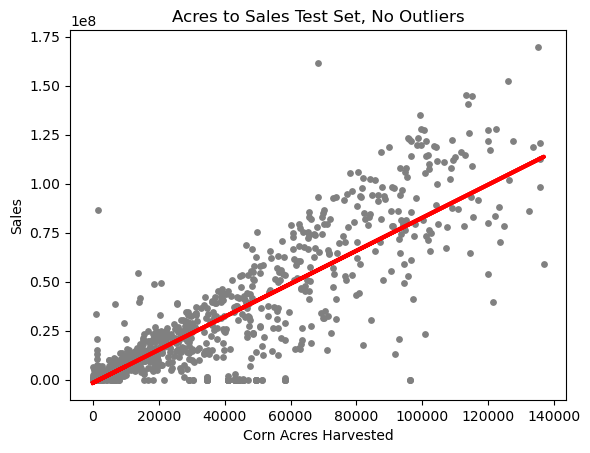

In [66]:
# Create a plot that shows the regression line from the model on the test set.

plot_testOut = plt
plot_testOut.scatter(Xout_test, yout_test, color='gray', s = 15)
plot_testOut.plot(Xout_test, yout_predicted, color='red', linewidth =3)
plot_testOut.title('Acres to Sales Test Set, No Outliers')
plot_testOut.xlabel('Corn Acres Harvested')
plot_testOut.ylabel('Sales')
plot_testOut.show()

In [67]:
# Create objects that contain the model summary statistics.

rmseout = mean_squared_error(yout_test, yout_predicted) # This is the mean squared error without outliers
r2out = r2_score(yout_test, yout_predicted) # This is the R2 score without outliers

In [68]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmseout)
print('R2 score: ', r2out)

Slope: [[843.22547896]]
Mean squared error:  229628256344671.94
R2 score:  0.7606497064860795


In [69]:
yout_predicted

array([[-1685074.07778435],
       [33970715.29989046],
       [  670897.91042006],
       ...,
       [  390103.82592755],
       [-1361275.49386506],
       [ 6350021.51119196]])

In [70]:
# Create a dataframe comparing the actual and predicted values of yout.

data_out = pd.DataFrame({'Actual': yout_test.flatten(), 'Predicted': yout_predicted.flatten()})
data_out.head(30)

,Actual,Predicted
0,35000,-1.685074e+06
1,50802000,3.397072e+07
2,853000,6.708979e+05
3,94298000,7.117551e+07
4,31797000,2.926046e+07
5,50754000,4.980986e+07
6,4474000,9.117488e+06
7,86010000,7.451215e+07
8,262000,-1.294661e+06
9,619000,-1.032418e+06


### even with outliers removed, MSE is way off and there are negative values
### This is not a good model for this dataset

#### the model and the predicted values are way out of alignment. Looks like this will not be a good method for predicting acres harvested by regression

#### R2 score is closely positively correlated, so we can at least predict that the more acres harvested, the more sales increase.

#### MSE still outrageous
#### R2 slightly decreased

#### I believe the reason the MSE is so far off has something to do with it not being limited to positive values, which is all the data set contains.  

## 7. Logarithmic Transformation

### log transform on this data may make it more viable for regression analysis

C:\Users\Noah\AppData\Local\Temp\ipykernel_26464\3304711421.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'], bins=50)


<Axes: xlabel='Sales', ylabel='Density'>

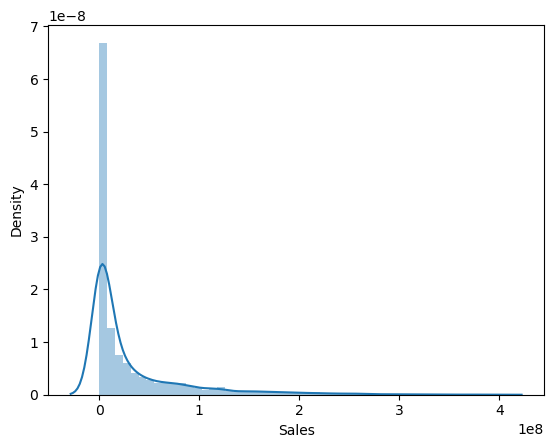

In [78]:
# show values for sales
sns.distplot(df['Sales'], bins=50)

C:\Users\Noah\AppData\Local\Temp\ipykernel_26464\2025990818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Corn Acres Harvested'], bins=50)


<Axes: xlabel='Corn Acres Harvested', ylabel='Density'>

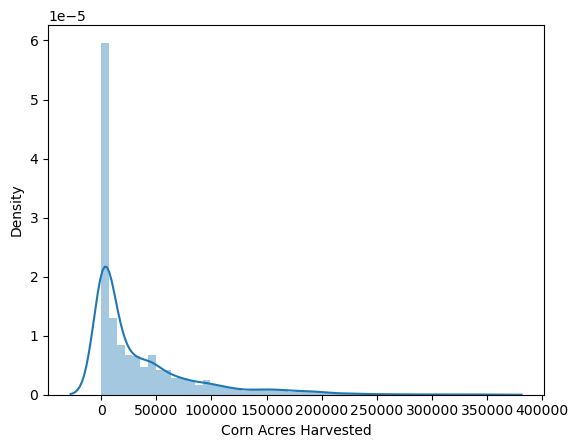

In [79]:
sns.distplot(df['Corn Acres Harvested'], bins=50)

### big skews due to small or null values.

In [81]:
# using log transformation to normalize data
#first replacing zero values with .1

zero_instances_sales = df[df['Sales'] == 0]
print(zero_instances_sales)

      Unnamed: 0  Year    County          State    Zip  Latitude  Longitude  \
6              6  2022   WAGONER       OKLAHOMA  74013     36.03     -95.78   
14            14  2012  SANDOVAL     NEW MEXICO  87001     35.38    -106.47   
15            15  2012  SANTA FE     NEW MEXICO  87010     35.37    -106.14   
19            19  2012    SIERRA     NEW MEXICO  87901     33.13    -107.24   
20            20  2012   SOCORRO     NEW MEXICO  87006     34.49    -106.84   
...          ...   ...       ...            ...    ...       ...        ...   
5024        5257  2022    OTTAWA       OKLAHOMA  74335     36.97     -94.85   
5035        5268  2022    DENTON          TEXAS  75007     33.01     -96.90   
5036        5269  2022   KLEBERG          TEXAS  78363     27.50     -97.86   
5057        5291  2022    TUCKER  WEST VIRGINIA  26260     39.13     -79.46   
5058        5292  2022    MARION  WEST VIRGINIA  26554     39.48     -80.14   

      PHZ  Corn Acres Harvested  Sales   CV  State 

#### 741 data points where corn was grown but not sold

In [83]:
zero_instances_acres = df[df['Corn Acres Harvested'] == 0]
print(zero_instances_acres)

Empty DataFrame
Columns: [Unnamed: 0, Year, County, State, Zip, Latitude, Longitude, PHZ, Corn Acres Harvested, Sales, CV, State ANSI, Ag District, Ag District Code, Concatenated]
Index: []


#### no nulls in acres set

In [85]:
# need no zero values for logaritmic transforms
def replace_zeros(x):
    return x.replace(0, 0.1)

# Apply the function to all rows
df_replacezero = df.transform(replace_zeros)

In [86]:
# log tranforming 
# Apply log transformation to the data
log_sales = (np.log(df_replacezero['Sales']))

In [87]:
c

0       11.170435
1       14.857200
2       14.478714
3       12.375815
4       15.868865
          ...    
5059     7.600902
5060     7.600902
5061    13.729953
5062    14.244692
5063    14.379687
Name: Sales, Length: 5064, dtype: float64


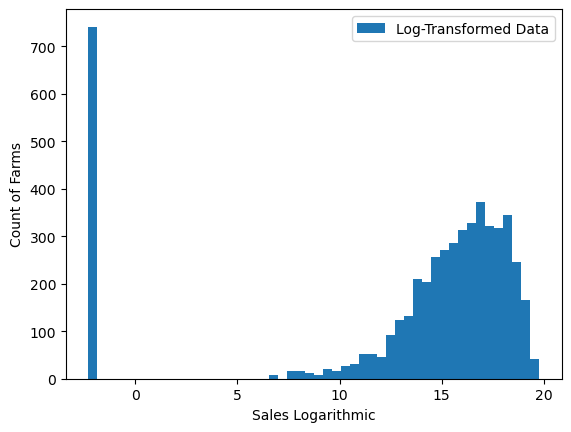

In [88]:
plt.hist(log_sales, bins=50, label='Log-Transformed Data')
plt.xlabel('Sales Logarithmic')
plt.ylabel('Count of Farms')
plt.legend()
plt.show()

### data vastly skewed because of 0 sales data points

C:\Users\Noah\AppData\Local\Temp\ipykernel_26464\1235748821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_sales, bins=25)


<Axes: xlabel='Sales', ylabel='Density'>

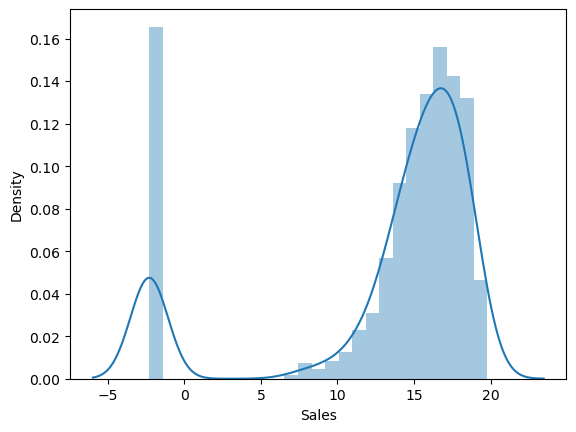

In [90]:
#plot logaritmic data for sales
sns.distplot(log_sales, bins=25)


C:\Users\Noah\AppData\Local\Temp\ipykernel_26464\2323132959.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_corn, bins=25) # Shows extreme values


<Axes: xlabel='Corn Acres Harvested', ylabel='Density'>

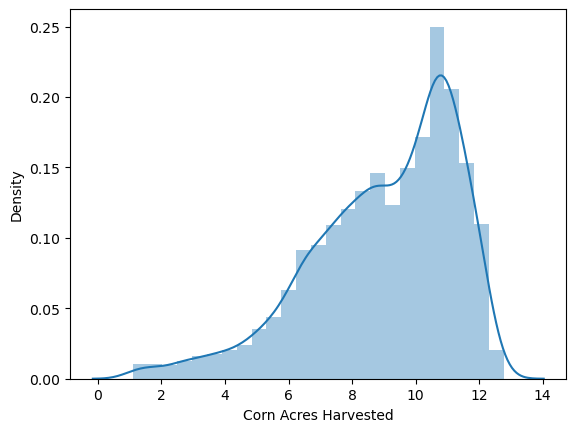

In [91]:
# repeat log transform with Corn acres data
# log tranforming 
# Apply log transformation to the data
log_corn = np.log(df['Corn Acres Harvested'])
sns.distplot(log_corn, bins=25) # Shows extreme values

#### conundrum... do we want to map zipcodes that have no sales but have acres harvested?

#### yes, but we want a map without those zips too.

### Removing 0 sales for log purposes


In [95]:
# Remove rows where the 'Sales' column has a value of 0

df_no_zero_sales = df[df['Sales'] != 0]


In [96]:
log_sales_nozero = np.log(df_no_zero_sales['Sales'])


In [97]:
log_sales_nozero.shape

(4323,)

In [98]:
# matching acres data to non-zeroed sales data for charting purposes
log_corn_nozero = np.log(df_no_zero_sales['Corn Acres Harvested'])


In [99]:
log_corn_nozero.shape

(4323,)

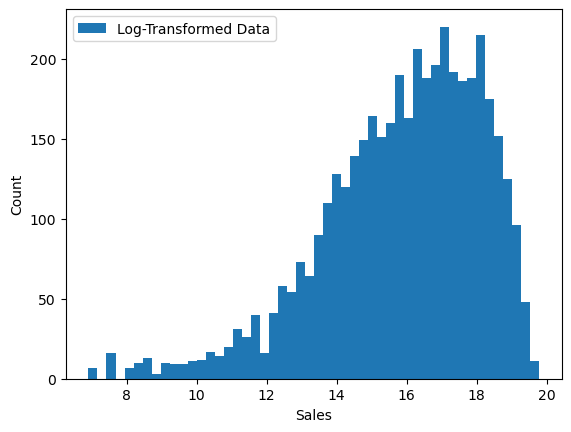

In [100]:
plt.hist(log_sales_nozero, bins=50, label='Log-Transformed Data')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.legend()
plt.show()

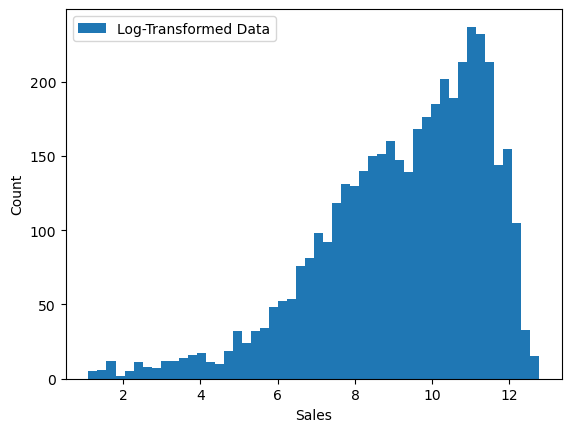

In [101]:
plt.hist(log_corn_nozero, bins=50, label='Log-Transformed Data')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.legend()
plt.show()

C:\Users\Noah\AppData\Local\Temp\ipykernel_26464\1976803769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_sales_nozero, bins=25)


<Axes: xlabel='Sales', ylabel='Density'>

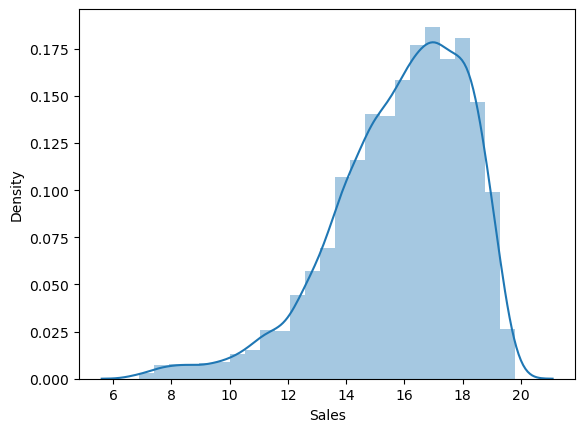

In [102]:
sns.distplot(log_sales_nozero, bins=25)
#log plot of sales data for farms without 0 sales


### distribution looks good. Now we have dataframes for sales and acres both with and without zeroes.
### First, regression with zeroes
### Following, regression without

## 8. Logarithmic Regression Analysis

### First with zeroes

In [106]:
 # Check the mean and exponent to reverse logarithm
(log_sales.mean())

13.20702417579088

In [107]:
 # Check the median
log_sales.median()

15.710503053050132

In [108]:
log_sales.min()

-2.3025850929940455

In [109]:
log_sales.max()

19.791320711943346

In [110]:
# Reshape the variables into NumPy arrays and put them into separate objects.

XLS = log_sales.values.reshape(-1,1)
yLC = log_corn.values.reshape(-1,1)

In [111]:
XLS

array([[11.17043516],
       [14.8571997 ],
       [14.47871386],
       ...,
       [13.72995267],
       [14.24469219],
       [14.37968736]])

In [112]:
yLC

array([[5.49716823],
       [8.02715011],
       [8.06054005],
       ...,
       [7.49331725],
       [6.45833828],
       [6.96979067]])

In [113]:
XLS.shape

(5064, 1)

In [114]:
yLC.shape

(5064, 1)

In [115]:
# Split data into a training set and a test set.

XLS_train, XLS_test, yLC_train, yLC_test = train_test_split(XLS, yLC, test_size=0.3, random_state=0)

In [116]:
# Create a regression object.

regression = LinearRegression()  #  will be fit onto the training set.

In [117]:
regression.fit(XLS_train, yLC_train)

LinearRegression()

In [118]:
yLC_predicted = regression.predict(XLS_test)

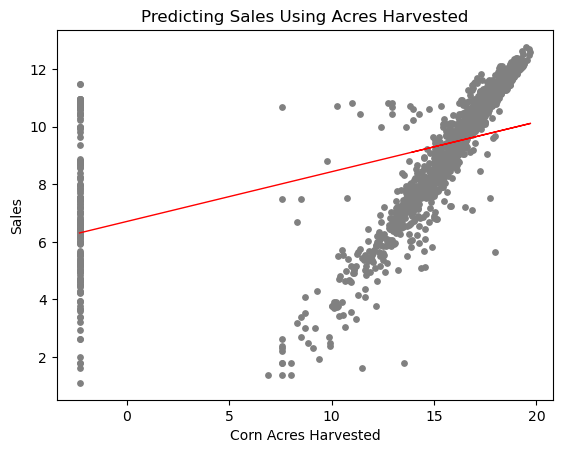

In [119]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(XLS_test, yLC_test, color='gray', s = 15)
plot_test.plot(XLS_test, yLC_predicted, color='red', linewidth =1)
plot_test.title('Predicting Sales Using Acres Harvested')
plot_test.xlabel('Corn Acres Harvested')
plot_test.ylabel('Sales')
plot_test.show()

 #### Our numbers are more normalized but due to zero values from sales data not very useful

In [121]:
# Create objects that contain the model summary statistics.

rmse_log = mean_squared_error(yLC_test, yLC_predicted) # This is the mean squared error for the logarithmic transformed data
r2_log = r2_score(yLC_test, yLC_predicted) # This is the R2 score for the Log transformed data

In [122]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_log)
print('R2 score: ', r2_log)

Slope: [[0.17281081]]
Mean squared error:  4.076358855988447
R2 score:  0.23499888322145823


## 9. Repeating Log Reg Analysis Without Zero Values

#### It seems likely that some areas grew corn but either withheld sales data or chose not to sell. 
#### In this case, we can remove zero values and only look at zip codes that chose to sell corn to see if there is a relationship between acres and sales

In [125]:
XLZ = log_sales_nozero.values.reshape(-1,1)
YLZ = log_corn_nozero.values.reshape(-1,1)

In [126]:
XLZ

array([[11.17043516],
       [14.8571997 ],
       [14.47871386],
       ...,
       [13.72995267],
       [14.24469219],
       [14.37968736]])

In [127]:
YLZ

array([[5.49716823],
       [8.02715011],
       [8.06054005],
       ...,
       [7.49331725],
       [6.45833828],
       [6.96979067]])

In [128]:
XLZ.shape

(4323, 1)

In [129]:
YLZ.shape

(4323, 1)

In [130]:
# Split data into a training set and a test set.

XLZ_train, XLZ_test, YLZ_train, YLZ_test = train_test_split(XLZ, YLZ, test_size=0.3, random_state=0)

In [131]:
# Create a regression object.

regression = LinearRegression()  #  will be fit onto the training set.

In [132]:
# Fit the regression object onto the training set.

regression.fit(XLZ_train, YLZ_train)

LinearRegression()

In [133]:
# Predict the values of y using X.

YLZ_predicted = regression.predict(XLZ_test)

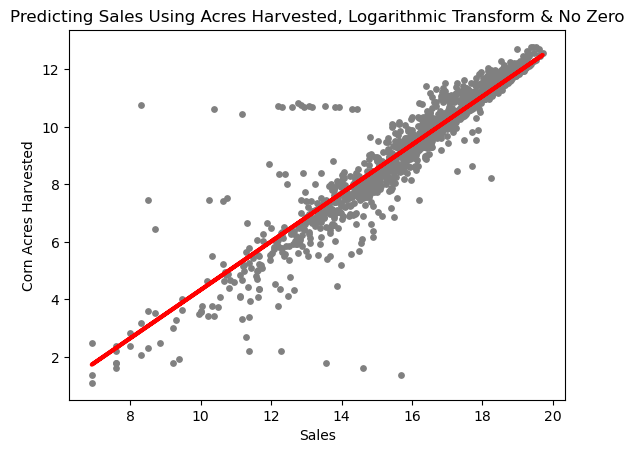

In [134]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(XLZ_test, YLZ_test, color='gray', s = 15)
plot_test.plot(XLZ_test, YLZ_predicted, color='red', linewidth =3)
plot_test.title('Predicting Sales Using Acres Harvested, Logarithmic Transform & No Zero')
plot_test.xlabel('Sales')
plot_test.ylabel('Corn Acres Harvested')
plot_test.show()

In [135]:
# Create objects that contain the model summary statistics.

rmseLZ = mean_squared_error(YLZ_test, YLZ_predicted) # This is the mean squared error
r2LZ = r2_score(YLZ_test, YLZ_predicted) # This is the R2 score. 

In [136]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmseLZ)
print('R2 score: ', r2LZ)

Slope: [[0.84027542]]
Mean squared error:  0.7255020633110785
R2 score:  0.8542383304115104


In [137]:
dataLZ = pd.DataFrame({'Actual': YLZ_test.flatten(), 'Predicted': YLZ_predicted.flatten()})
dataLZ.head(30)

,Actual,Predicted
0,8.963800,9.391423
1,10.726829,10.838181
2,11.311360,11.390576
3,5.529429,5.691710
4,8.200014,8.383330
5,6.968850,7.120720
6,5.003946,5.362287
7,12.342424,12.113524
8,6.956545,7.907079
9,11.626290,11.315110


## 10 Reflections

### Sales data normalized through Logarithm and eliminating zero data.

#### Transformations and eliminations required to reach acceptable regression level for machine analysis
#### in the end, it is a pretty good model for machine prediction
#### Once the zero values were removed, it became clear there is a strong correlation
#### next step would be to analyze based on year- is the correlation stronger in 2012 or 2022?
#### also, we could compare other factors like Plant Hardiness Zone to Sales or Latitude to Acres Harvested
#### I believe that those data comparisons would have less manipulation required before they are able to be analyzed through machine learning